In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

---
Import Dataset

In [12]:
#data import
game_data = pd.read_csv('data/test2.zip')

In [13]:
#Check the vital statistics of the dataset using the `type` and `shape` attributes.
print("Data type : ", type(game_data))
print("Data dims : ", game_data.shape)

#Check the variables (and their types) in the dataset using the `dtypes` attribute.
print(game_data.dtypes)

#quick look at the data
game_data.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (67138, 30)
Unnamed: 0                      int64
AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Positive                        int64
Negative                        int64
Recommendations                 int64
Notes                          object
Average playtime forever        int64
Average playtime two weeks      int64
Median playtime forever         int64
Median playt

,Unnamed: 0,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,...,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,...,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,...,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,...,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,...,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,...,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [9]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70210 entries, 0 to 70209
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       70210 non-null  int64  
 1   Name                        70209 non-null  object 
 2   Release date                70210 non-null  object 
 3   Estimated owners            70210 non-null  object 
 4   Peak CCU                    70210 non-null  int64  
 5   Required age                70210 non-null  int64  
 6   Price                       70210 non-null  float64
 7   DLC count                   70210 non-null  int64  
 8   About the game              67909 non-null  object 
 9   Supported languages         70210 non-null  object 
 10  Full audio languages        70210 non-null  object 
 11  Reviews                     9121 non-null   object 
 12  Header image                70210 non-null  object 
 13  Website                     346

---
Remove Columns

In [10]:
#remove columns
print(game_data.columns.tolist())

['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies']


### unnecessary columns (not relevant to data analysis)
| URLS/contact info | images/videos | irrelevant/unsuable data |
|---|---|---|
| website | screenshots | user score (mostly nan) |
| support url | movies | score rank (mostly null) |
|  support email | header image | achievement count |
|  metacritic url |   |   |


In [7]:
removed_columns = ["Header image", "Website", "Support url", "Support email", "Metacritic url", "User score", "Score rank", "Achievements", "Screenshots", "Movies"]
cleaned_game_data = game_data.drop(columns=removed_columns)
cleaned_game_data.to_csv("test.csv", sep=',', encoding='utf-8')
cleaned_game_data.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [9]:
test = cleaned_game_data.loc[cleaned_game_data['Genres'].str.contains(r"utilities", case=False, na=False)]

test2 = cleaned_game_data.loc[~cleaned_game_data['Genres'].str.contains(r"utilities", case=False, na=False)]

test2 = test2.loc[~test2['Tags'].str.contains(r"utilities", case=False, na=False)]

test2.to_csv("test1.csv", sep=',', encoding='utf-8')
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69358 entries, 0 to 70209
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       69358 non-null  int64  
 1   Name                        69357 non-null  object 
 2   Release date                69358 non-null  object 
 3   Estimated owners            69358 non-null  object 
 4   Peak CCU                    69358 non-null  int64  
 5   Required age                69358 non-null  int64  
 6   Price                       69358 non-null  float64
 7   DLC count                   69358 non-null  int64  
 8   About the game              67058 non-null  object 
 9   Supported languages         69358 non-null  object 
 10  Full audio languages        69358 non-null  object 
 11  Reviews                     9043 non-null   object 
 12  Windows                     69358 non-null  bool   
 13  Mac                         693

In [11]:
test3 = test2.dropna(subset=["Categories", "Genres", "Tags"], how='all')
test3.to_csv("test2.csv", sep=',', encoding='utf-8')
test3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67138 entries, 0 to 70209
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       67138 non-null  int64  
 1   Name                        67138 non-null  object 
 2   Release date                67138 non-null  object 
 3   Estimated owners            67138 non-null  object 
 4   Peak CCU                    67138 non-null  int64  
 5   Required age                67138 non-null  int64  
 6   Price                       67138 non-null  float64
 7   DLC count                   67138 non-null  int64  
 8   About the game              67051 non-null  object 
 9   Supported languages         67138 non-null  object 
 10  Full audio languages        67138 non-null  object 
 11  Reviews                     9043 non-null   object 
 12  Windows                     67138 non-null  bool   
 13  Mac                         671

---
Positive: number of positive reviews
Negative: number of negative reviews

In [22]:
posRate = pd.DataFrame(test2['Positive']) 
negRate = pd.DataFrame(test2['Negative']) 
price = pd.DataFrame(test2['Price']) 
rate_price = pd.DataFrame(test2[["Positive", "Negative", "Price"]])

In [23]:
rate_price.describe().round(2)

,Positive,Negative,Price
count,69358.00,69358.00,69358.00
mean,1141.05,187.32,7.17
std,26895.01,5058.53,10.85
min,0.00,0.00,0.00
25%,1.00,0.00,0.99
50%,10.00,3.00,4.99
75%,61.00,19.00,9.99
max,5764420.00,895978.00,999.00


<AxesSubplot:>

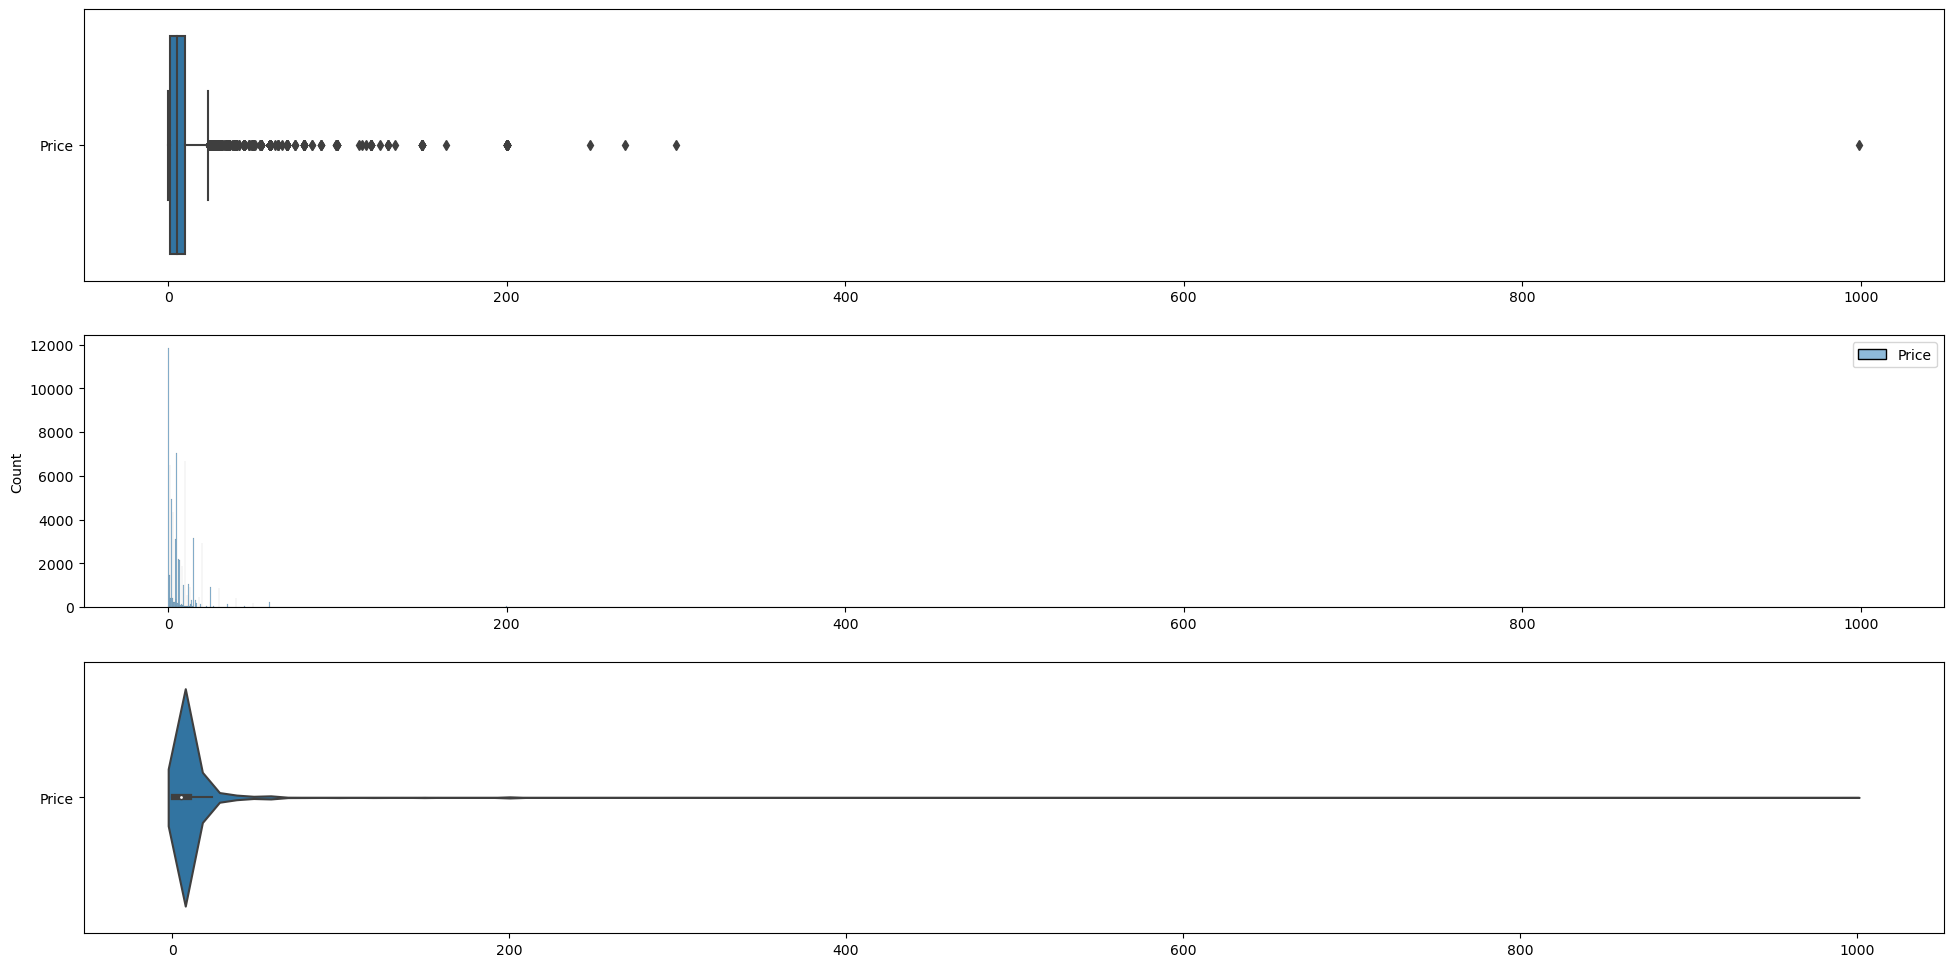

In [24]:
f, axes = plt.subplots(3, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = price, orient = "h", ax = axes[0])
sb.histplot(data = price, ax = axes[1])
sb.violinplot(data = price, orient = "h", ax = axes[2])

<AxesSubplot:>

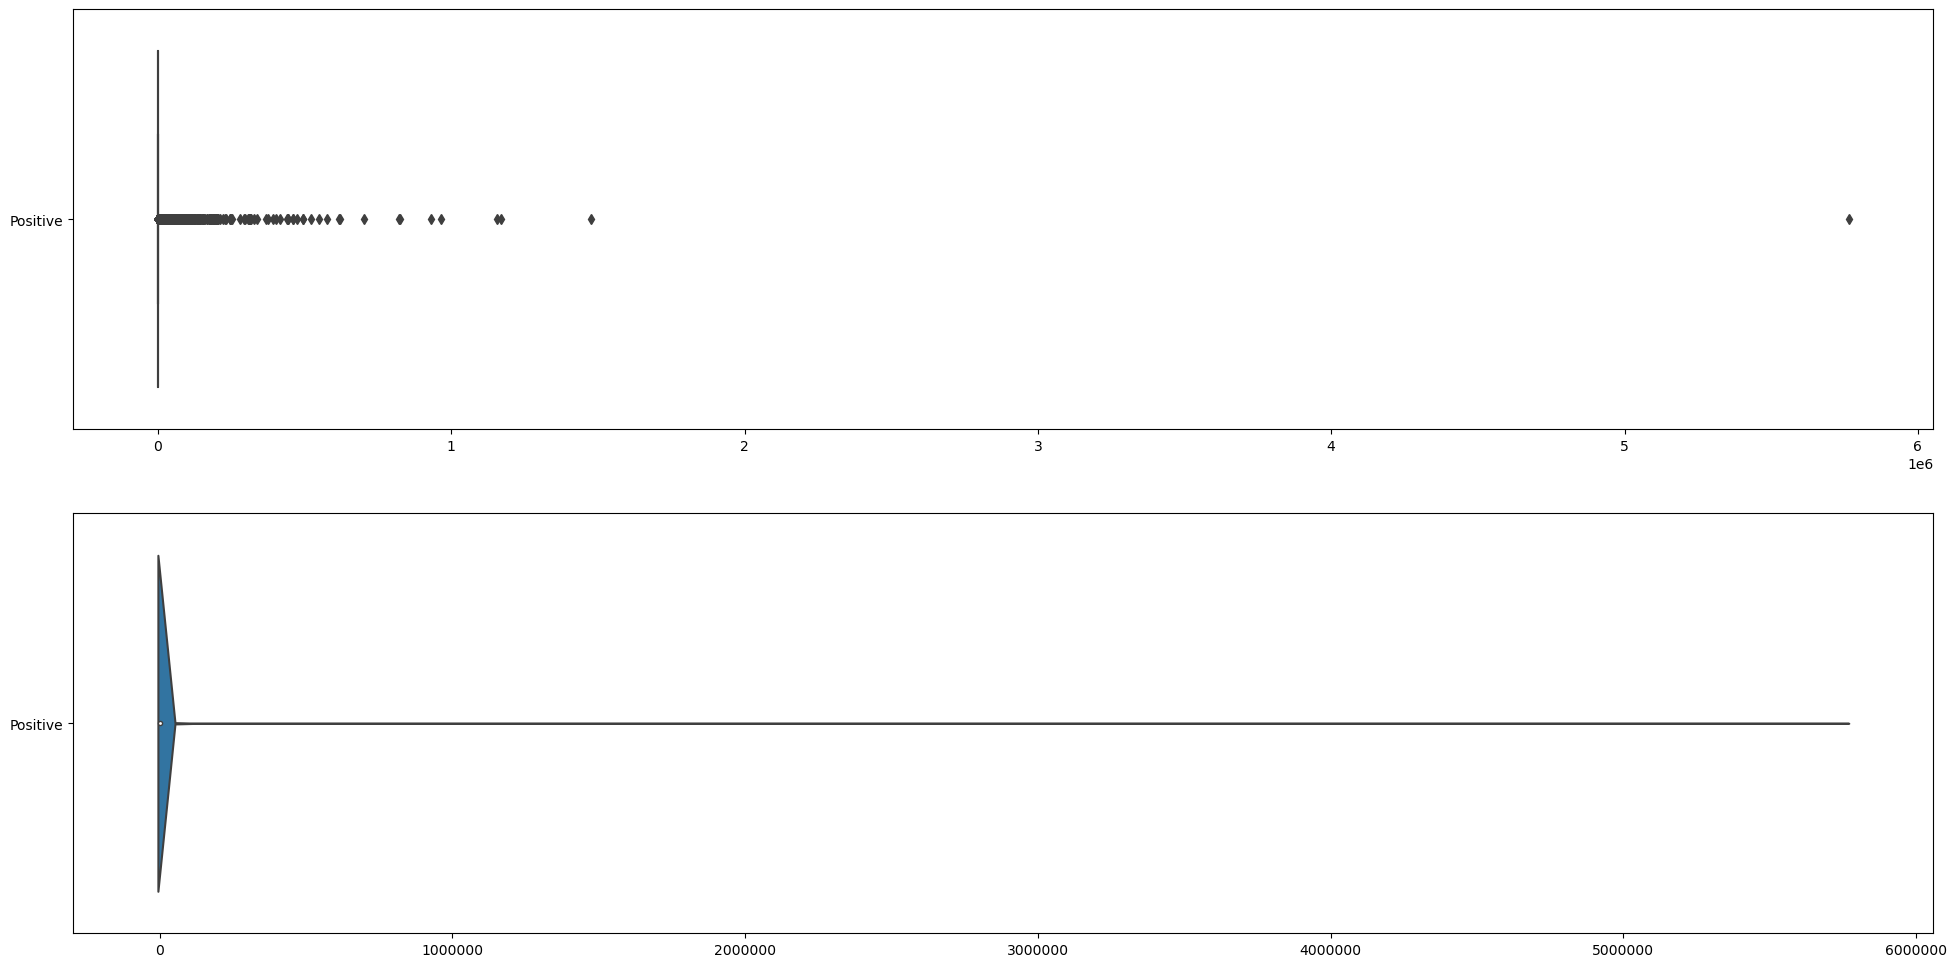

In [25]:
f, axes = plt.subplots(2, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = posRate, orient = "h", ax = axes[0])
# sb.histplot(data = posRate, ax = axes[1])
sb.violinplot(data = posRate, orient = "h", ax = axes[1])

<AxesSubplot:>

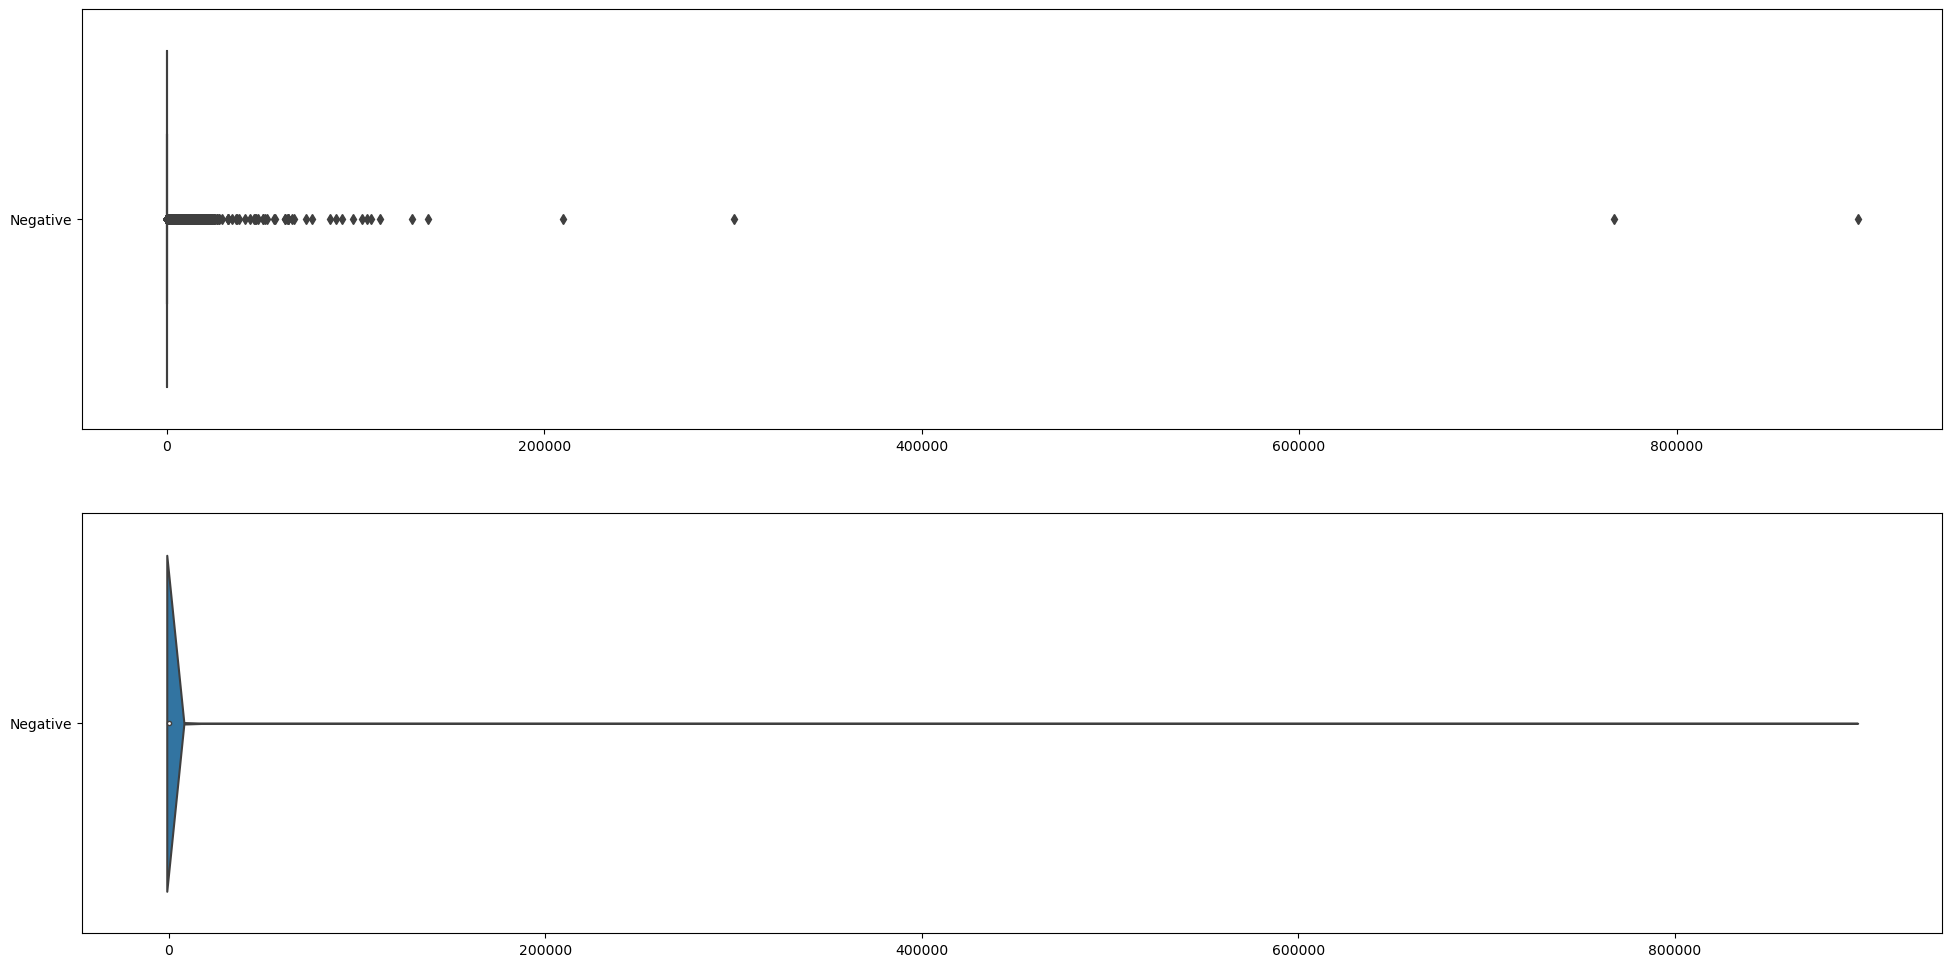

In [26]:
f, axes = plt.subplots(2, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = negRate, orient = "h", ax = axes[0])
# sb.histplot(data = negRate, ax = axes[1])
sb.violinplot(data = negRate, orient = "h", ax = axes[1])

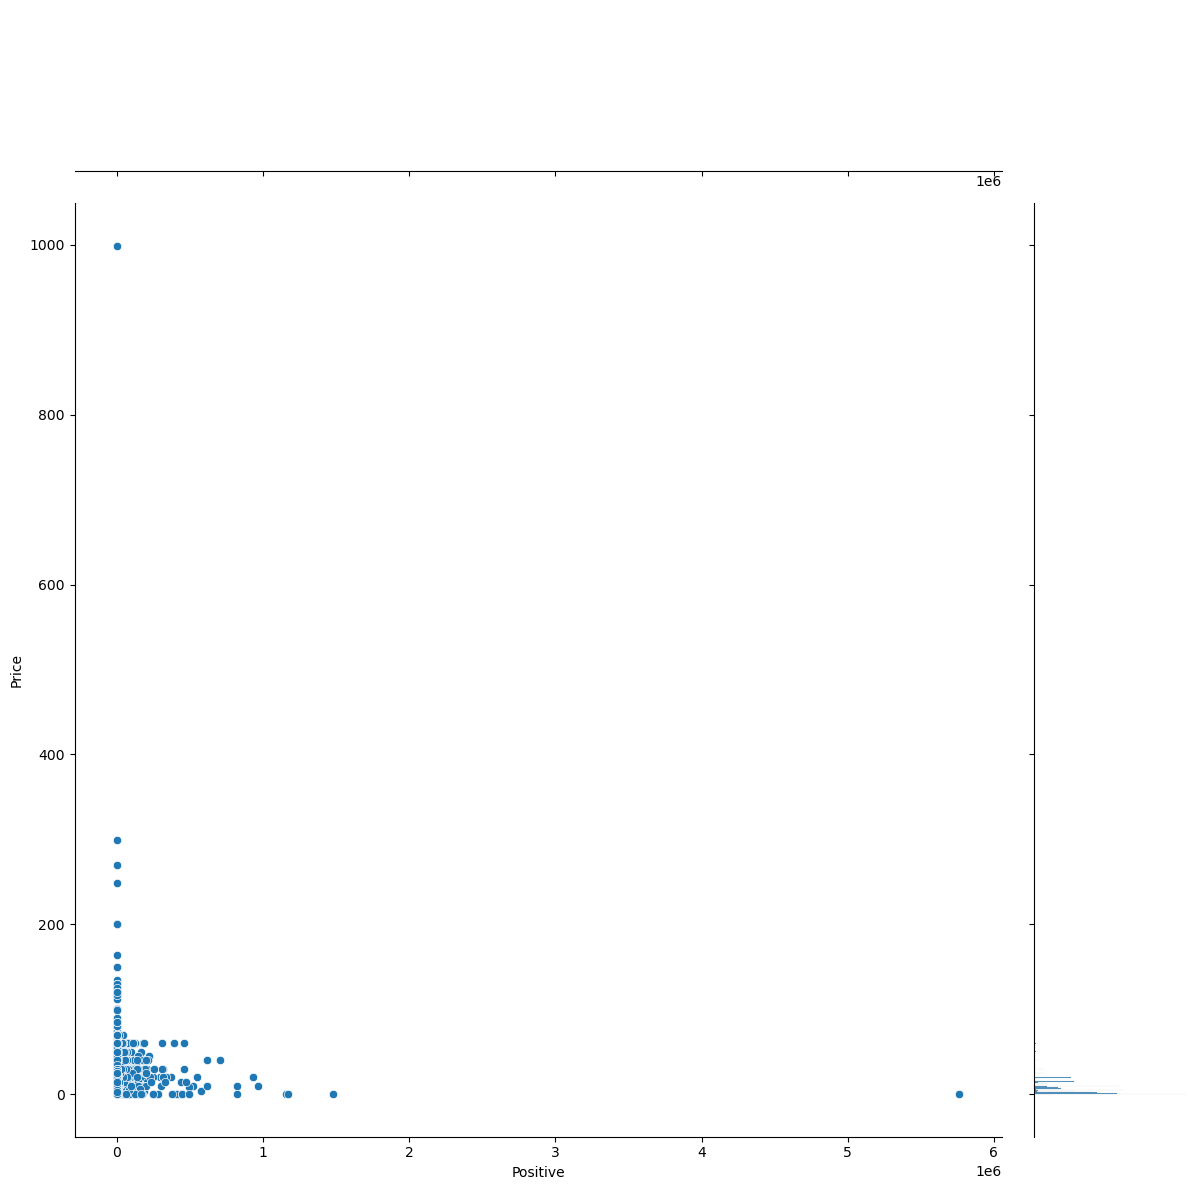

In [27]:
pos_price = pd.concat([posRate, price], axis = 1).reindex(posRate.index)
sb.jointplot(data = pos_price, x = "Positive", y = "Price", height = 12)

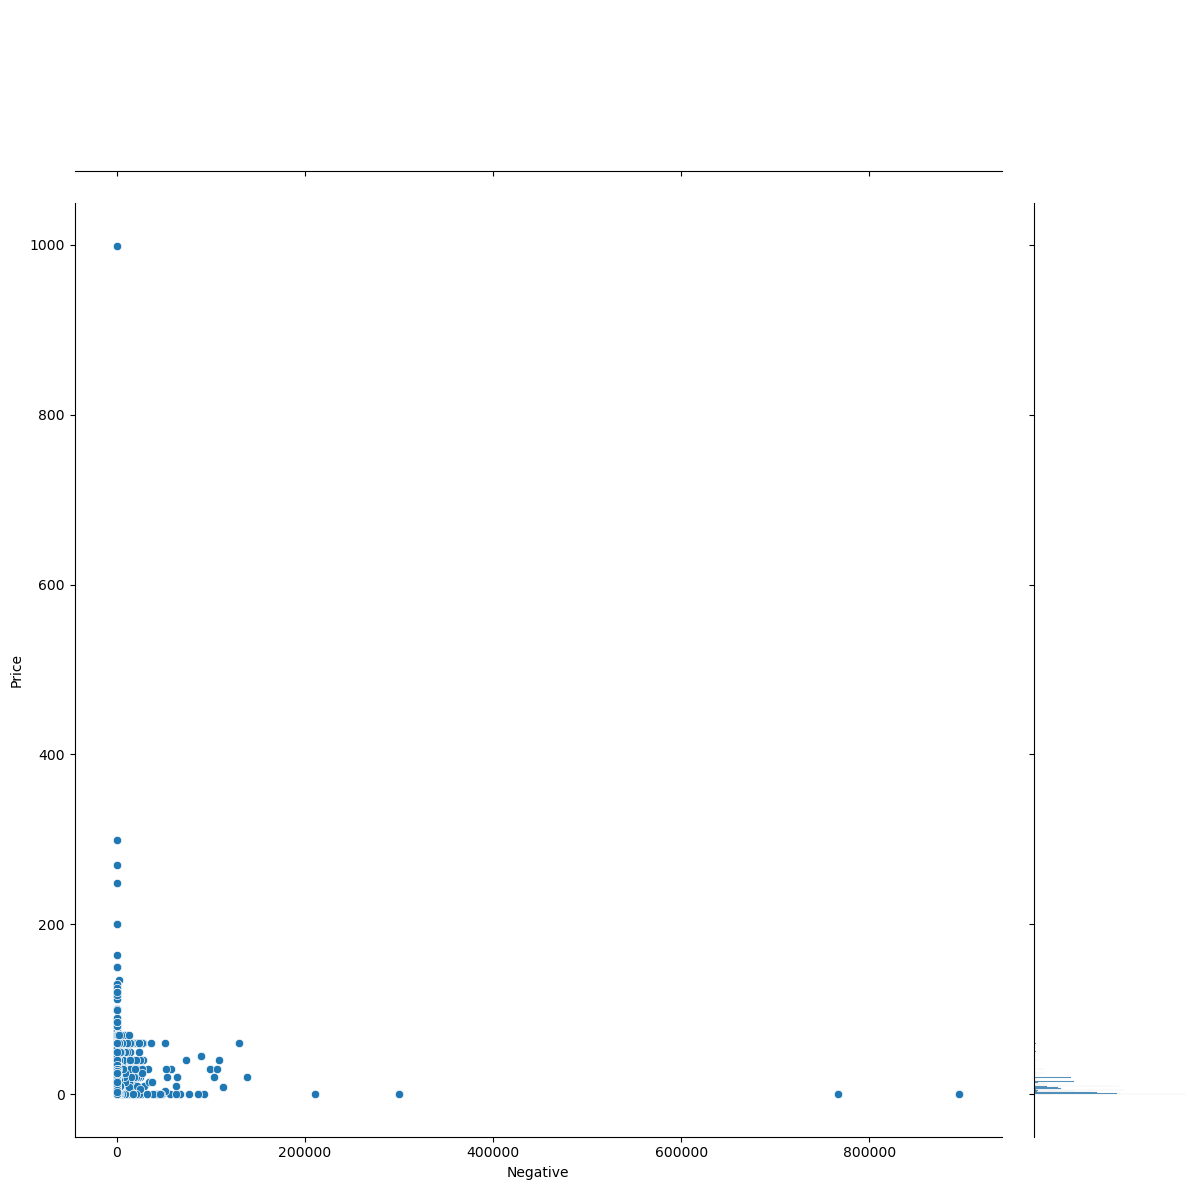

In [29]:
neg_price = pd.concat([negRate, price], axis = 1).reindex(negRate.index)
sb.jointplot(data = neg_price, x = "Negative", y = "Price", height = 12)

In [28]:
print(rate_price.corr())

          Positive  Negative     Price
Positive  1.000000  0.786179  0.036194
Negative  0.786179  1.000000  0.029345
Price     0.036194  0.029345  1.000000


---
Full Audio Languages

In [18]:

import regex as re
audio_data = pd.read_csv('data/Audio.csv')
index = 0


for row in game_data.itertuples(index = True, name = 'Data'):

    temp = re.sub('[\[\]\'\s]', '', row[12])   #remove square brackets and apostrophes from string
    temp = temp.split(',')    #split string by ',' into a list 

    if temp[0] == '':
        temp.clear()
        temp.append('None')                              

    length = len(temp)

    if temp[0] == 'None':
        length -= 1

    audio_data.at[index, 'Number of full audio languages'] = length   #store num of audio lang for each game

    audio_data.at[index, 'Full audio languages'] = temp   #store list of languages

    index += 1

audio_data.to_csv("data/Audio.csv", index=False)   #overwrite audio.csv
print(audio_data.head(10))

     AppID                                Name  \
0    20200                    Galactic Bowling   
1   655370                        Train Bandit   
2  1732930                        Jolt Project   
3  1355720                            Henosis™   
4  1139950               Two Weeks in Painland   
5  1469160                      Wartune Reborn   
6  1659180                           TD Worlds   
7  1968760  Legend of Rome - The Wrath of Mars   
8  1178150               MazM: Jekyll and Hyde   
9   320150           Deadlings: Rotten Edition   

   Number of full audio languages Full audio languages  
0                             0.0               [None]  
1                             0.0               [None]  
2                             0.0               [None]  
3                             0.0               [None]  
4                             0.0               [None]  
5                             0.0               [None]  
6                             0.0               [N

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Number of full audio languages, dtype: float64
count    70210.000000
mean         1.156545
std          5.086645
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        103.000000
Name: Number of full audio languages, dtype: float64


<AxesSubplot:xlabel='Number of full audio languages', ylabel='Density'>

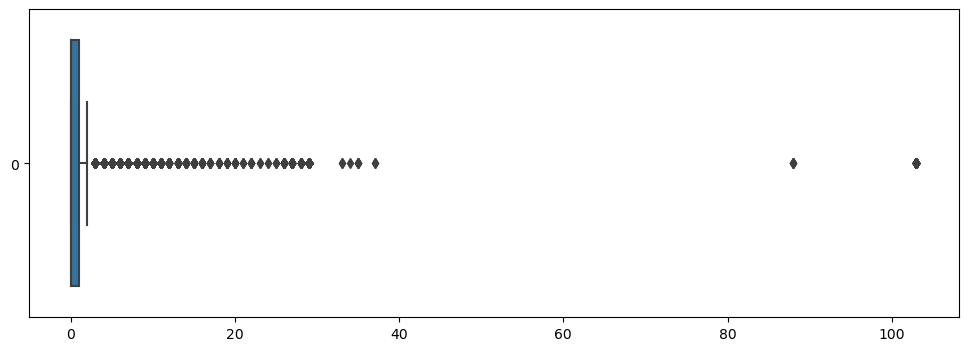

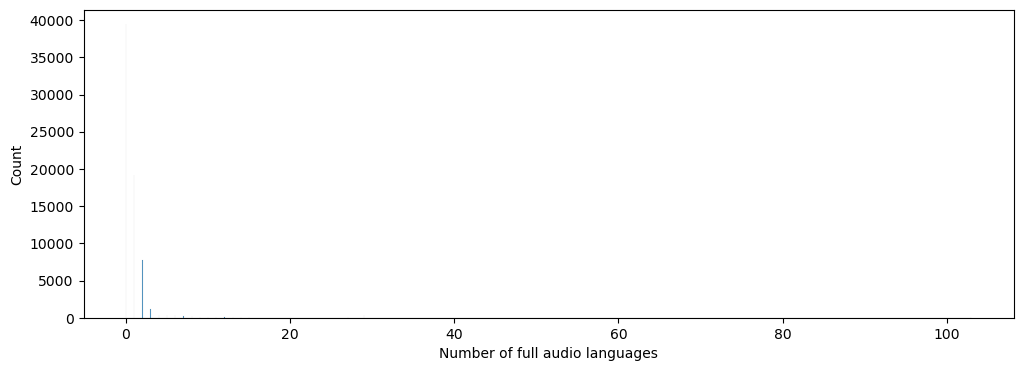

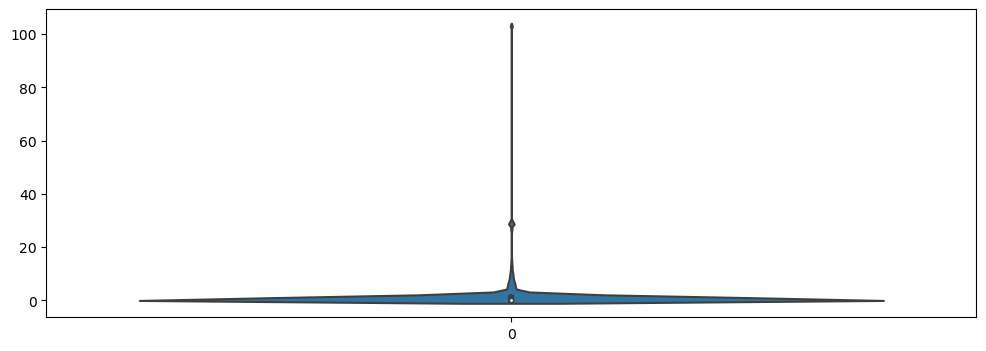

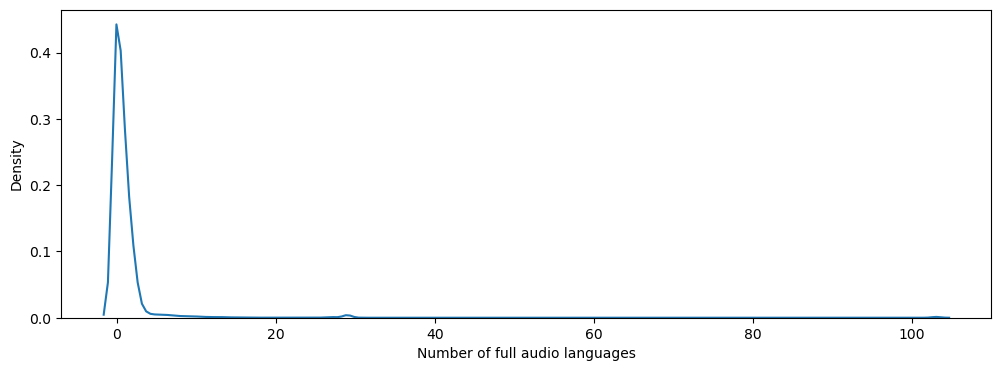

In [19]:
#univariate analysis of audio_count 
audio_count = audio_data['Number of full audio languages']
print(audio_count.head())

#summary
print(audio_count.describe())

#boxplot
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = audio_count, orient = "h")

#hist plot
f = plt.figure(figsize=(12, 4))
sb.histplot(data = audio_count)

#violin plot
f = plt.figure(figsize=(12, 4))
sb.violinplot(data = audio_count)

#kde plot
f = plt.figure(figsize=(12, 4))
sb.kdeplot(data = audio_count)

   Number of full audio languages  Price
0                             0.0  19.99
1                             0.0   0.99
2                             0.0   4.99
3                             0.0   5.99
4                             0.0   0.00
                                Number of full audio languages     Price
Number of full audio languages                        1.000000  0.019073
Price                                                 0.019073  1.000000


<AxesSubplot:>

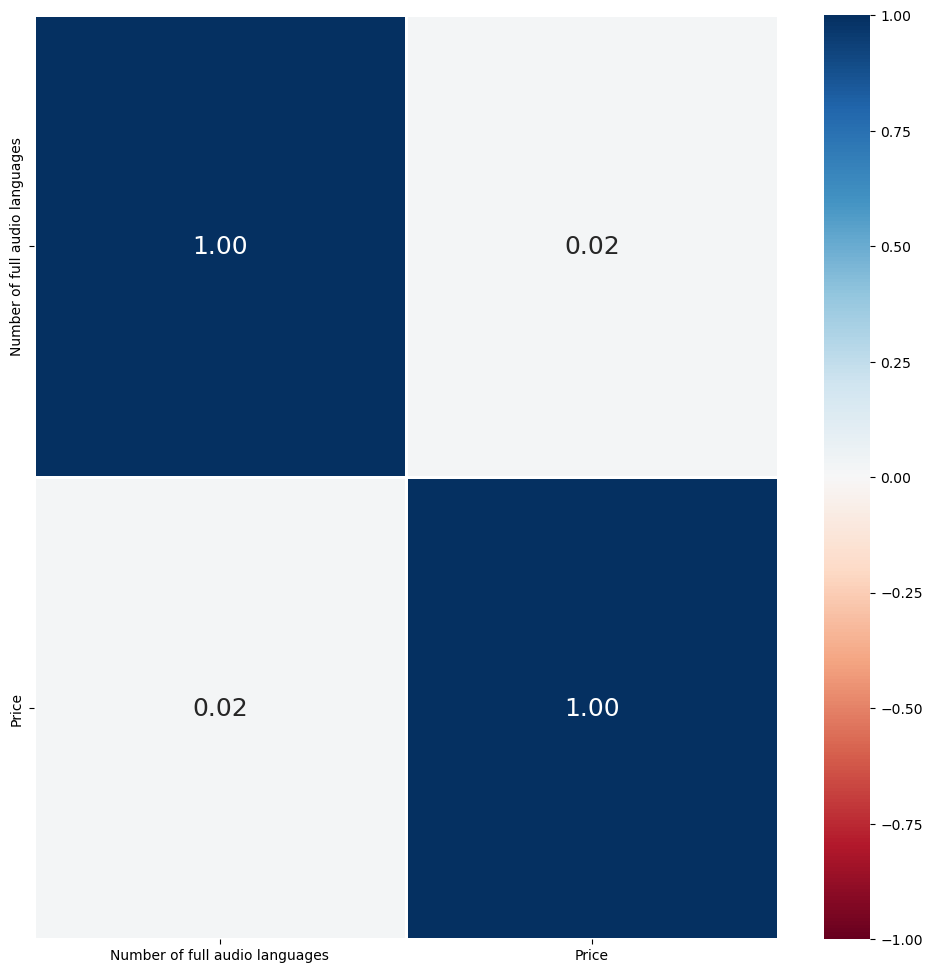

In [20]:
# Analyse relationship between audio count and price
# Add Price to the dataframe
audio_price = audio_count.copy()
audio_price = pd.concat([audio_price, game_data["Price"]], axis = 1).reindex(audio_price.index)
print(audio_price.head())

# Correlation Matrix
print(audio_price.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(audio_price.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

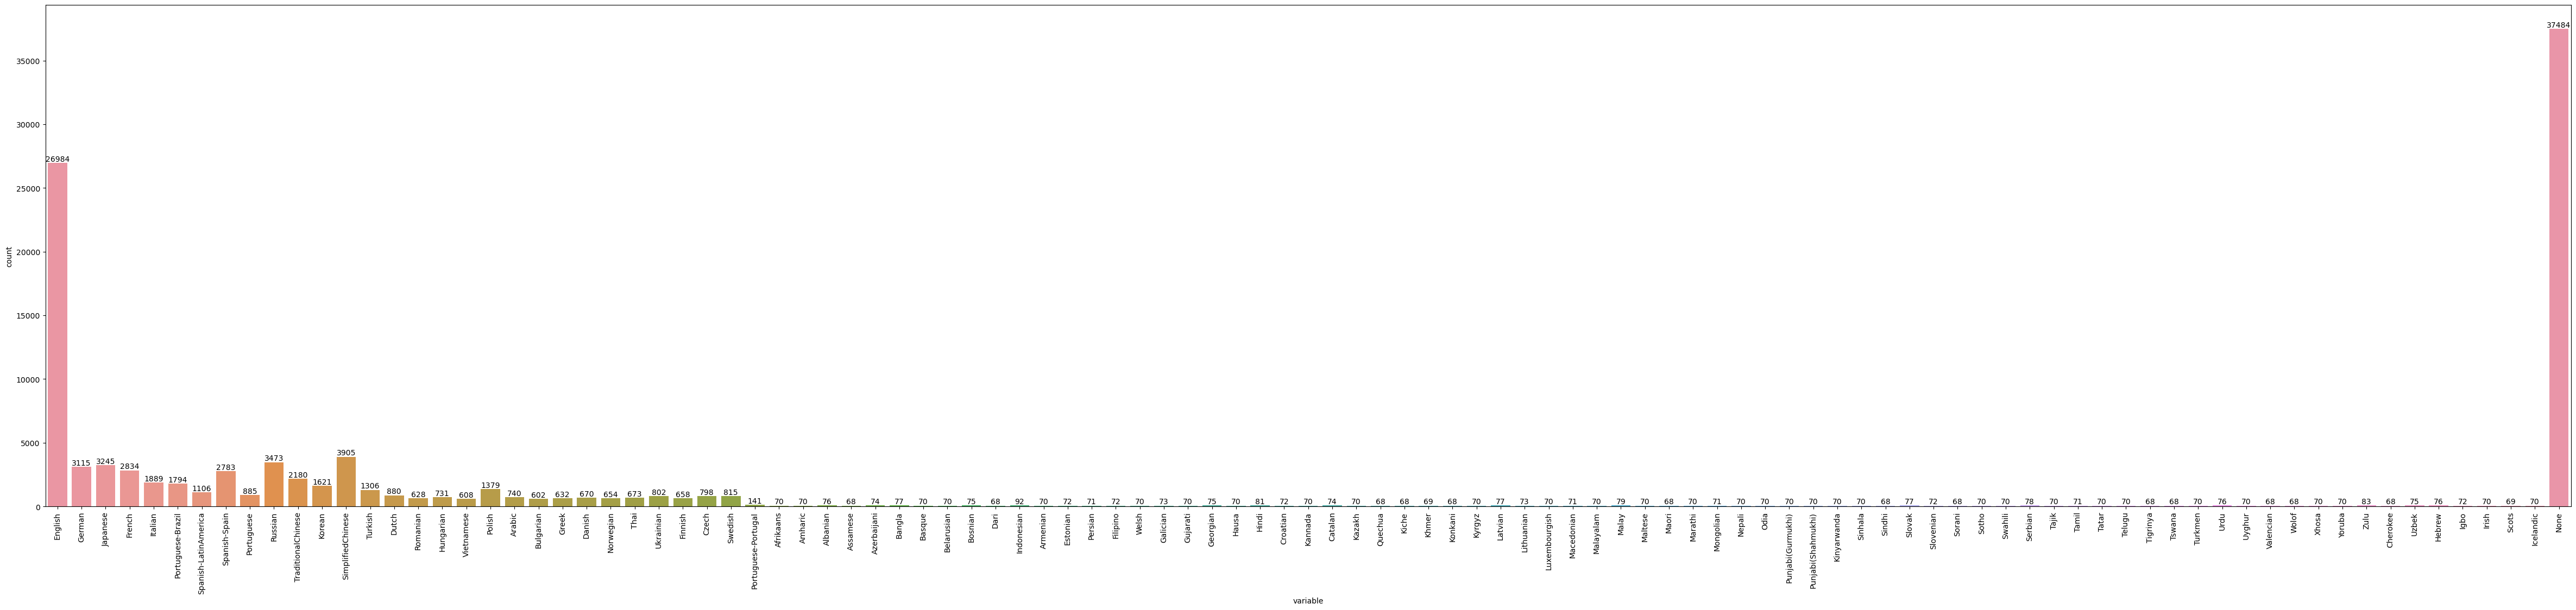

In [22]:
#countplot of each individual audio language
audio_sep = pd.read_csv('data/Audio_separated.csv')

audio_sep.drop(columns =['Price', 'AppID'], inplace=True)

audio_sep2 = audio_sep.melt(value_vars=audio_sep.columns)
audio_sep2 = audio_sep2[audio_sep2["value"] != False]
f = plt.figure(figsize=(60, 12))

graph = sb.countplot(data=audio_sep2, x="variable")
graph.bar_label(graph.containers[0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

plt.show()


In [ ]:
#find all audio languages 

#replace the TRUE values with the price
audio_sep_price = pd.read_csv('data/Audio_separated_price.csv').copy()
x=0
print(game_data.shape[0])
while x != game_data.shape[0]:

    for row in audio_sep_price.itertuples(index = True, name = 'Data'):
        audio_sep_price.loc[x] = audio_sep_price.loc[x].replace(to_replace=True, value=row[2])
        audio_sep_price.loc[x] = audio_sep_price.loc[x].replace(to_replace=[False,'False'], value=None)
    
        x+=1

        if (x == game_data.shape[0]):
            break

#print(audio_sep_price.head(10))
audio_sep_price.to_csv('data/Audio_separated2.csv', index=False)


67138
     AppID  Price English German Japanese French Italian Portuguese-Brazil  \
0    20200  19.99     NaN    NaN      NaN    NaN     NaN               NaN   
1   655370   0.99    None   None     None   None    None              None   
2  1732930   4.99    None   None     None   None    None              None   
3  1355720   5.99    None   None     None   None    None              None   
4  1139950    NaN    None   None     None   None    None              None   
5  1469160    NaN    None   None     None   None    None              None   
6  1659180  10.99    None   None     None   None    None              None   
7  1968760   9.99    9.99   9.99     None   None    None              None   
8  1178150  14.99    None   None     None   None    None              None   
9   320150   3.99    3.99   None     3.99   None    None              None   

  Spanish-LatinAmerica Spanish-Spain  ... Yoruba  Zulu Cherokee Uzbek Hebrew  \
0                  NaN           NaN  ...    NaN   NaN 

count    32626.000000
mean         7.513103
std          9.585030
min          0.490000
25%          1.990000
50%          4.990000
75%          9.990000
max        299.900000
Name: None, dtype: float64


[Text(0, 0, 'English'),
 Text(1, 0, 'German'),
 Text(2, 0, 'Japanese'),
 Text(3, 0, 'French'),
 Text(4, 0, 'Italian'),
 Text(5, 0, 'Portuguese-Brazil'),
 Text(6, 0, 'Spanish-LatinAmerica'),
 Text(7, 0, 'Spanish-Spain'),
 Text(8, 0, 'Portuguese'),
 Text(9, 0, 'Russian'),
 Text(10, 0, 'TraditionalChinese'),
 Text(11, 0, 'Korean'),
 Text(12, 0, 'SimplifiedChinese'),
 Text(13, 0, 'Turkish'),
 Text(14, 0, 'Dutch'),
 Text(15, 0, 'Romanian'),
 Text(16, 0, 'Hungarian'),
 Text(17, 0, 'Vietnamese'),
 Text(18, 0, 'Polish'),
 Text(19, 0, 'Arabic'),
 Text(20, 0, 'Bulgarian'),
 Text(21, 0, 'Greek'),
 Text(22, 0, 'Danish'),
 Text(23, 0, 'Norwegian'),
 Text(24, 0, 'Thai'),
 Text(25, 0, 'Ukrainian'),
 Text(26, 0, 'Finnish'),
 Text(27, 0, 'Czech'),
 Text(28, 0, 'Swedish'),
 Text(29, 0, 'Portuguese-Portugal'),
 Text(30, 0, 'Afrikaans'),
 Text(31, 0, 'Amharic'),
 Text(32, 0, 'Albanian'),
 Text(33, 0, 'Assamese'),
 Text(34, 0, 'Azerbaijani'),
 Text(35, 0, 'Bangla'),
 Text(36, 0, 'Basque'),
 Text(37, 0, 'Be

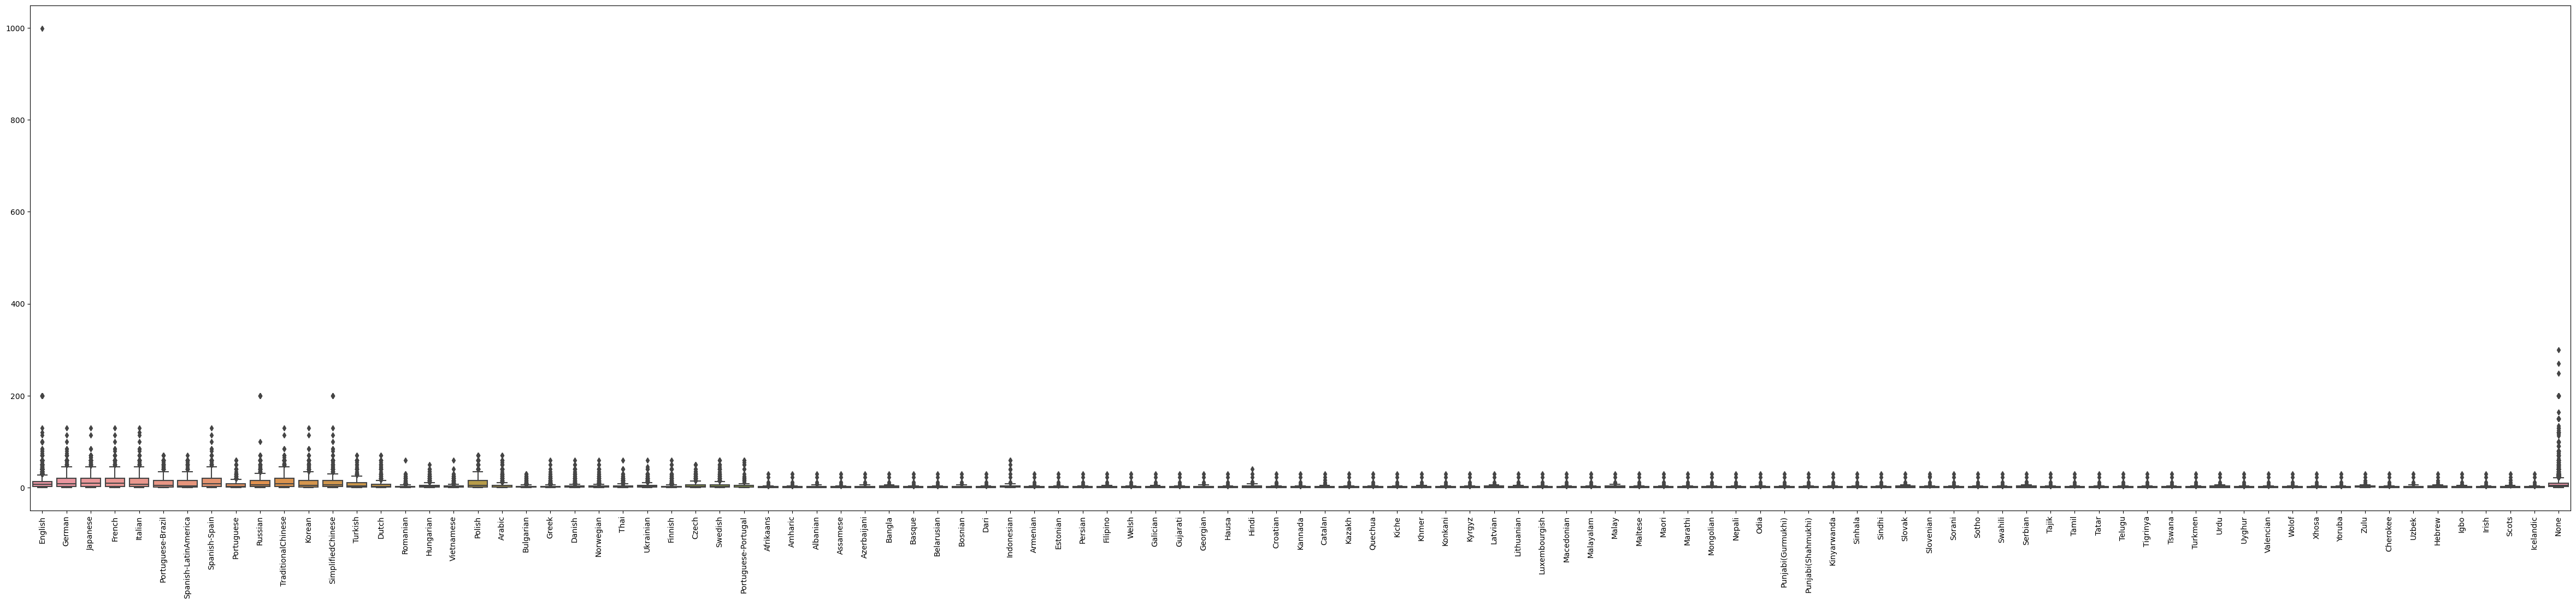

In [24]:
# boxplots for every audio language against price

audio_sep_price = pd.read_csv('data/Audio_separated2.csv').copy()
print(audio_sep_price['None'].describe())

audio_sep_price = audio_sep_price.drop(columns =['AppID', 'Price'])
f = plt.figure(figsize=(60, 12))


graph = sb.boxplot(data = audio_sep_price)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
